<h1>
  <center>
    Deteccion de Fake News
  </center>
</h1>
<p>
  <center>
    ALEJANDRO JOSE ESPINEL PEREZ<br>
    Código: 2180027<br>
    Escuela de Ingeniería de Sistemas<br>
    Universidad Industrial de Santander<br>
    2020
  </center>
</p>

<h2>
  Una breve introducción
</h2>
<p align="justify">
  En este proyecto se quiere implementar un detector de <b>FAKE NEWS</b> que tomando como Datasets con diferentes caracteristicas como lo son titulo de la noticia asi como fecha cuerpo y tipo de noticia poder indentificar sus caracteristicas mas importantes.<br>
Para ello el principal reto es poder trabajar con texto mis redes neuronales ya que estas trabajan es con numeros asi que tenemos que preprocesar el texto de una manera optima y de esta manera si poder trabajar.
</p>

<h2>
  Motivación
</h2>
<p align="justify">
En los ultimos tiempos de todas las ramas de Machine Learning la que mas se habia quedado atras en el estado del arte era el procesamiento del lenguage natural y los recientes aportes en el estado del arte como lo fue el de GPT-3 de openIA motivan a estudiar a esta area que de por si es bastante compleja e interesante<sup><a href="https://openai.com/blog/better-language-models/" target="_blank">[1]</a></sup> <br>
Es por esto que llevar estos avances en el estado del arte a un problema que nos afecta dia a dia a todos es de por si un reto interesante por si mismo y es el problema de poder detectar noticias falsas un problema que afecta a todos y existen en todas las areas como economia salud incluso ofertas de trabajo y que en ocasiones perjudica la integridad de las personas.
</p>

<h2>
   Retos
</h2>
<p align="justify">
  En este proyecto tiene diferentes retos que superar como lo son:
  <ul>
    <li>Limpieza del Dataset (creación y manipulación de un dataset) ya que como lo son signos de puntuacion y palabras que por si solas lo que me generan ruido ademas que no todas las palabras asi como no todos los encabezados tienen la misma longitud,asi como caracteristicas propias del lenguage</li>
    <li>Modelos de clasificación que mas se adapten con el problema(encontrar el optimo)</li>
  </ul>
</p>

<h2>
   Funcionamiento
</h2>
<h3>
    1 Creación del Dataset
</h3>
<p align="justify">
Extraer el dataset y mezclarlo aleatoriamente ya que se tienen dos dataset por separados las noticias True o las False.  
</p>

In [1]:
#@title  MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ProyectoIA')

print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEqYNKAThTxmWnS32cKN-xLyn__12l3_CF5UlVHS_zIwXqbd82i8oM
Mounted at /content/drive
/content/drive/My Drive/ProyectoIA


In [ ]:
#@title  LOAD LIB { display-mode: "form" }
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
nltk.download("stopwords")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Se mezcla el data set como ademas se trata de limpiar el datasets asi como identificar longitudes de encabezados entre otras caracteristicas

In [2]:
false=pd.read_csv('Fake.csv')
true=pd.read_csv('True.csv')
true['label']=1
false['label']=0
d=pd.concat((true, false)).sample(frac=1).reset_index(drop=True)
d.head()

NameError: ignored

<h2>
   2. Visualizacion de Datos
</h2>

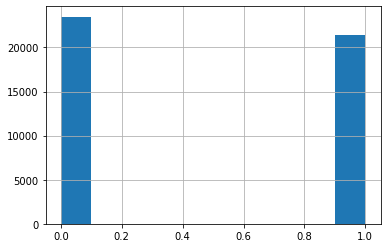

In [ ]:
d['label'].hist()

In [ ]:

d['text'] = d['text'] + " " + d['title']

<h2>
   3.Preprocesamiento
</h2>

In [ ]:
#haciendo uso de stopwords quitamos vamos a hacer limpieza de los datos para despues construir nuestro modelo
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
print(punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:

#Removemos lo brackets de mi texto
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# removemos la url de caso de averlas
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#quitamos las palabras que por si solas no aportan nada
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def limpieza(text):
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Applimaos la funcion de limpieza
d['text']=d['text'].apply(limpieza)


<h2>
  Palabras mas usadas en noticias verdaderas
</h2>

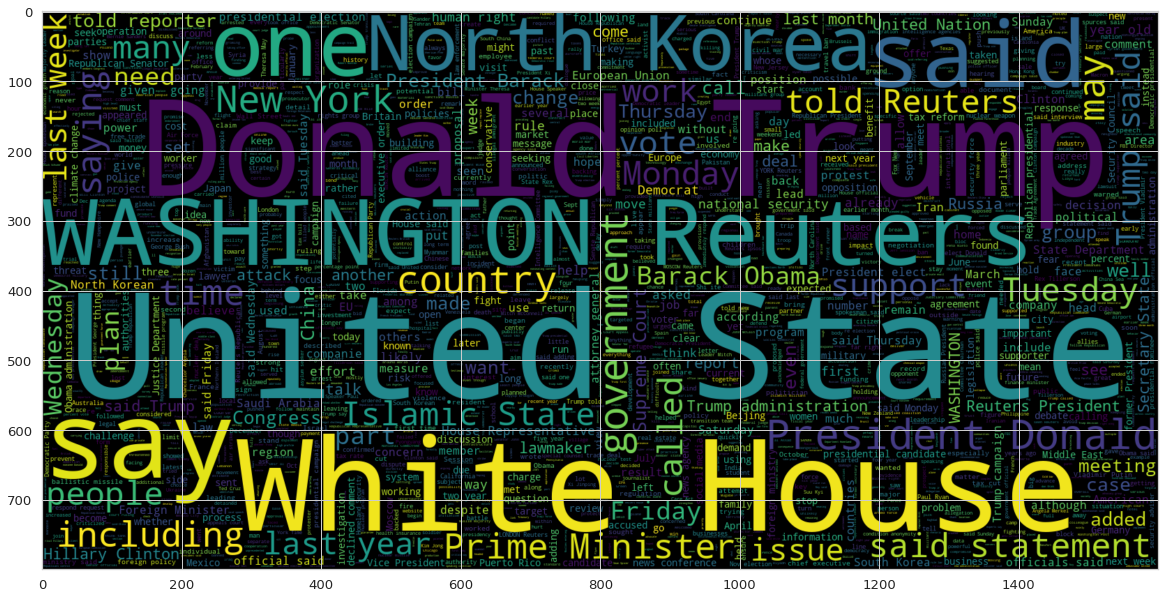

In [ ]:
plt.figure(figsize = (20,20)) # texto verdadero
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(d[d.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

<h2>
  Palabras mas usadas en noticias falsas
</h2>

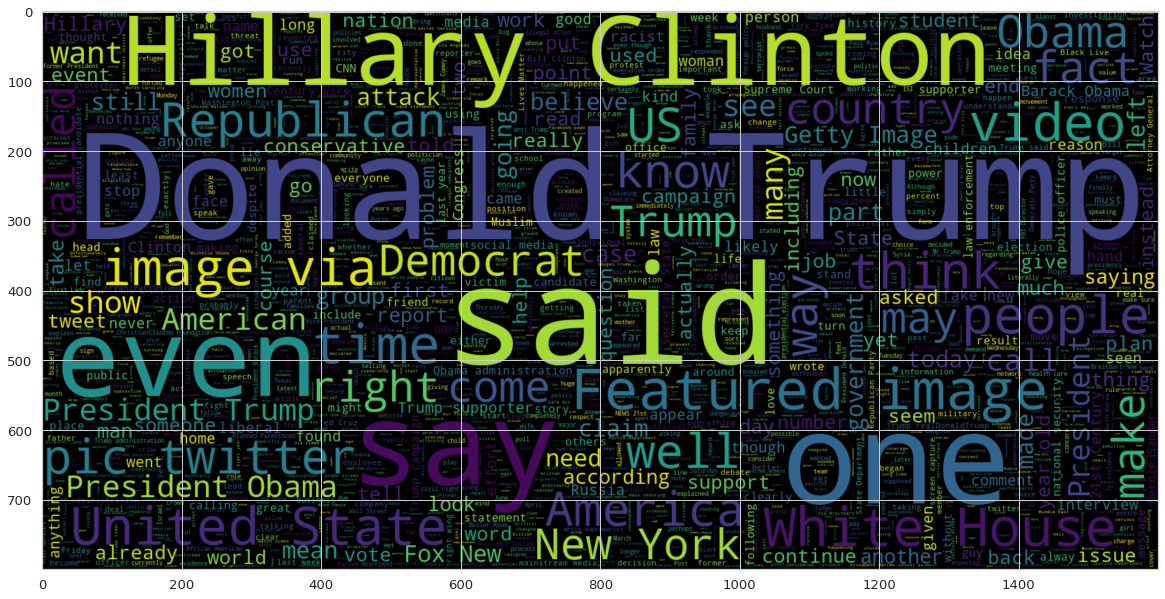

In [ ]:
plt.figure(figsize = (20,20)) # texto verdadero
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(d[d.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

<h2>
  4.Vamos a obtener metricas del corpus (texto completo) para ver estadisticas
</h2>

In [ ]:
corpus = [w for j in text for w in j.strip()]
print(corpus[:20])

['JERUSALEM/GAZA', '(Reuters)', 'Islamist', 'group', 'Hamas']

In [ ]:
## palabras mas usadas 
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(20)
most_common = dict(most_common)
most_common

{'Donald': 27795,
 'President': 33180,
 'Trump': 111503,
 'U.S.': 50441,
 'also': 30325,
 'one': 29370,
 'people': 33115,
 'said': 93162,
 'said.': 26194,
 'would': 54613}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def  get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<h2>
   N-gramas mas comunes
</h2>

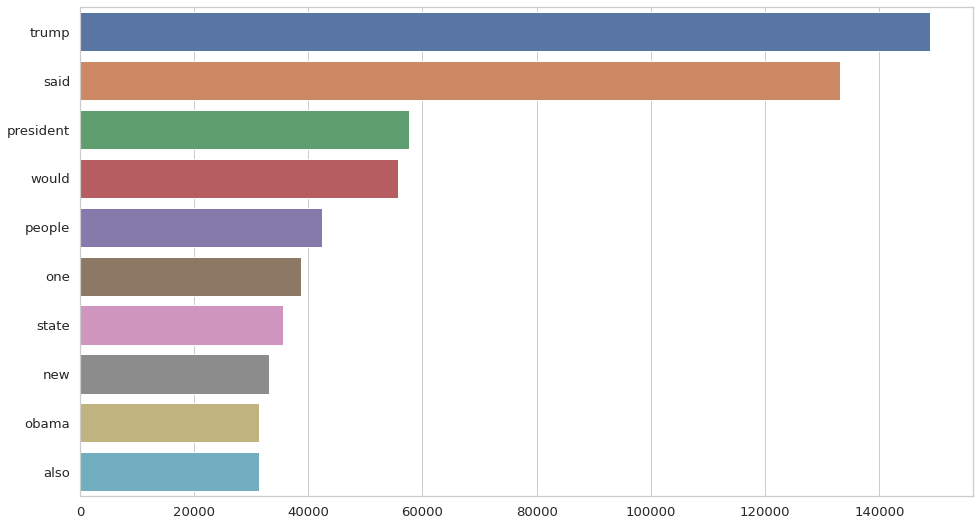

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(d.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

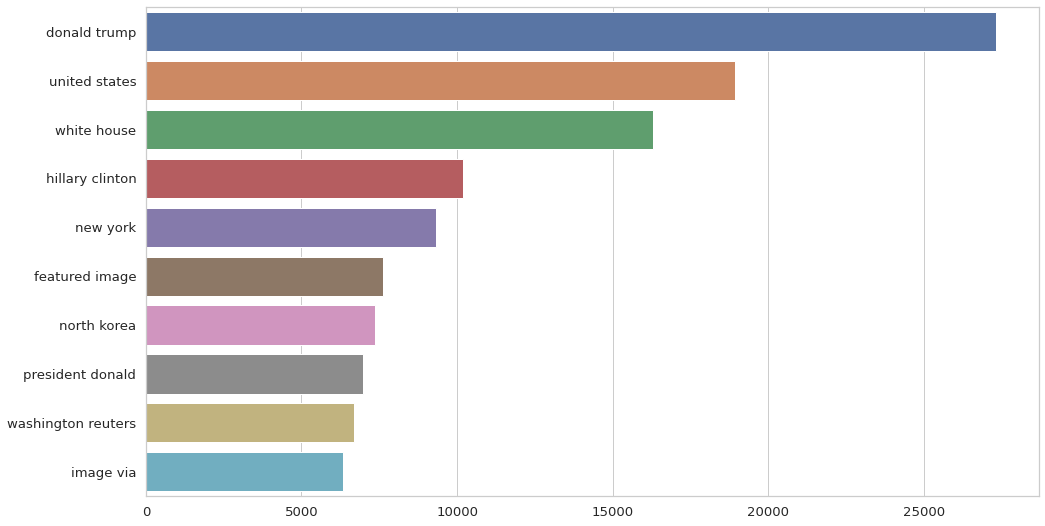

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(d.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

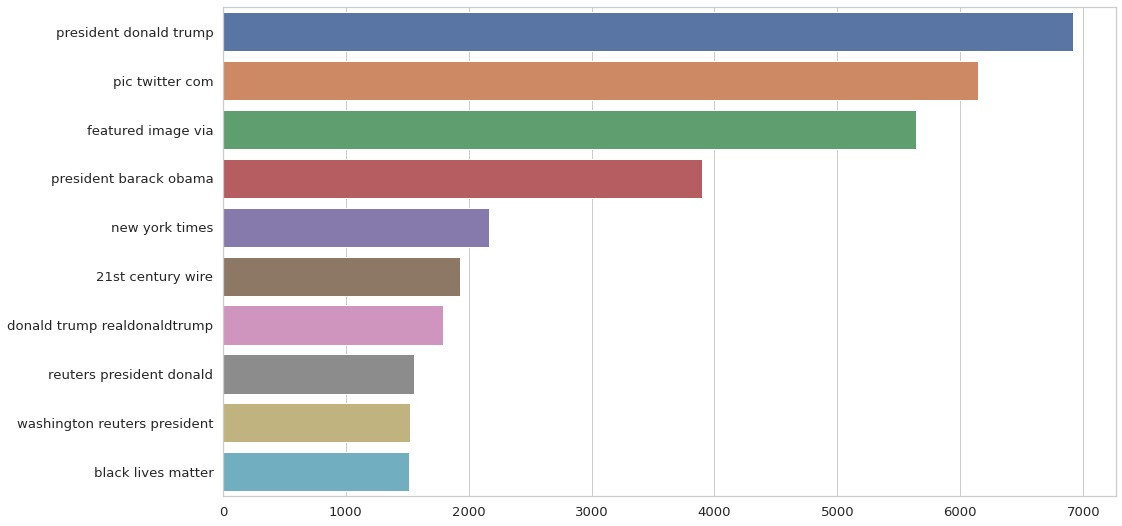

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(d.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

<h2>
5.Pasar las palabras a vectores haciendo uso de embeddings ya construidos especificamente el embedings GloVe.  
</h2>

In [ ]:
X=d['text'].values
y=d['label'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [ ]:
max_features = 10000
maxlen = 300

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [ ]:
EMBEDDING_FILE = 'glove-twitter/glove.twitter.27B.100d.txt'
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
print(embeddings_index['the'])
print(len(embeddings_index['the']))

[ 9.5152e-02  3.7024e-01  5.4291e-01  1.9621e-01  4.8205e-02  3.2033e-01
 -5.9638e-01  1.5868e-02 -1.2989e-01 -6.3028e-01  8.1944e-02  2.4164e-01
 -6.0990e+00 -6.8557e-01  5.0354e-01 -3.4089e-02  1.1705e-01 -7.7403e-03
 -8.6512e-02  4.3617e-01 -4.3982e-01  2.6125e-01 -4.0348e-02 -1.9194e-01
  8.3204e-02 -5.8246e-01 -3.1923e-02  1.2630e-01  4.0120e-01  6.8906e-02
 -1.0517e-01 -2.0804e-01 -4.2554e-01  4.7799e-01  3.4651e-01  2.4057e-01
  5.0244e-02 -7.2587e-02 -2.4347e-03 -5.0342e-01 -1.0601e+00 -3.1586e-01
 -3.2457e-02 -7.6317e-02  7.9045e-01  8.6367e-02 -1.9632e-01  5.7566e-02
  8.4129e-01 -4.2020e-01 -1.1335e-03 -8.5632e-02  6.1910e-02  2.1423e-01
 -1.0356e-01 -3.6946e-02 -2.6005e-01 -3.5657e-01  5.4321e-02  3.0875e-02
  1.4092e-01 -9.1998e-02 -4.1841e-01 -3.1135e-01 -1.4937e-01 -2.2699e-04
 -3.3454e-01 -1.4848e-01 -1.1944e-01 -2.7174e-01  3.1320e-01 -1.0998e-01
 -4.7524e-01  1.4056e-01  3.9641e-01 -4.9413e-02 -4.2601e-01 -2.3576e-01
  6.1482e-02 -3.5313e-02  2.4161e+00  2.8979e-01  3

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


Creo mi red neuronal variando mis caracteristicas

In [ ]:
batch_size = 200
epochs = 5
embed_size = 100
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

<h2>
   6.Construimos mi modelo y hacemos uso de capas de  LSTM(Long short-term memory)
</h2>
<p>
ya que a este tipos de redes se les da muy bien aprender secuencias,lo que las hace muy atractivas en este tipo de problema</p>

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128, return_sequences = True , recurrent_dropout = 0.10 , dropout = 0.10))
model.add(LSTM(units=64 , recurrent_dropout = 0.5 , dropout = 0.5))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units = 16 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


<h2>
  7. Fase de entrenamiento y de testeo de mi modelo
</h2>

In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/3
132/132 [==============================] - 641s 5s/step - loss: 0.1566 - accuracy: 0.9343 - val_loss: 0.0651 - val_accuracy: 0.9813
Epoch 2/3
132/132 [==============================] - 645s 5s/step - loss: 0.0415 - accuracy: 0.9860 - val_loss: 0.0119 - val_accuracy: 0.9959
Epoch 3/3
132/132 [==============================] - 641s 5s/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0100 - val_accuracy: 0.9973


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

351/351 [==============================] - 51s 147ms/step - loss: 0.0100 - accuracy: 0.9973
Test accuracy: 0.9973273873329163


In [ ]:
pred = model.predict_classes(X_test)
pred[:5]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [1],
       [0],
       [1]], dtype=int32)

In [ ]:
####matriz de confusion
cm = confusion_matrix(y_test,pred)
cm

array([[5929,   23],
       [   7, 5266]])

#referencias
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

http://projector.tensorflow.org/

https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/